In [1]:
import pandas as pd
import keras
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras import preprocessing
import numpy as np
from keras import layers
from keras import models
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import cv2
from PIL import Image
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
import pickle
import os
from PIL import Image

### Llamamos la imágenes guardadas por clase en la carpeta

In [2]:
train_datagen = ImageDataGenerator( 
    rescale=1./255)

train_generator = train_datagen.flow_from_directory('C:/Users/crist/BOOTCAMP/PROYECTO FINAL/imagenes/train',target_size=(256,256),
    batch_size=20,class_mode='categorical')


Found 1129 images belonging to 5 classes.


In [3]:
test_generator = train_datagen.flow_from_directory('C:/Users/crist/BOOTCAMP/PROYECTO FINAL/imagenes/test',target_size=(256,256),
    batch_size=20,class_mode='categorical')

Found 110 images belonging to 5 classes.


In [22]:
directorio = 'C:/Users/crist/BOOTCAMP/PROYECTO FINAL/imagenes/jdr'
archivos = os.listdir(directorio)
for archivo in archivos:
    if not archivo.endswith('.jpg'):
    continue
    try:
    Image.open('C:/Users/crist/BOOTCAMP/PROYECTO FINAL/imagenes/jdr/'+archivo)
    except:
    print('La imagen {} es corrupta.'.format(archivo))

La imagen hero_2.jpg es corrupta.
La imagen Patek-Philippe-Nautilus-5711_1A-010_2-1.jpg es corrupta.
La imagen white-steel-santos-100-cartier-watch-21116086-1_2.jpg es corrupta.


## Redes Neuronales

#### Tiramos la primera red neuronal con tres capas convolucionales con maxpooling y una densa con dropoupt con la salida

In [60]:
# esta red queda con loss: 1.1104 - accuracy: 0.6078
model = models.Sequential()
model.add(layers.Conv2D(64, kernel_size=(5, 5),activation='relu',input_shape=(256,256,3)))
model.add(layers.MaxPooling2D(pool_size=(3, 3), padding = 'same'))
model.add(layers.Conv2D(100, (5, 5), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(3, 3), padding = 'same'))
model.add(layers.Conv2D(100, (5, 5), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides = 2))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(5, activation='sigmoid'))

In [61]:
model.compile(optimizer="rmsprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
history=model.fit(train_generator, epochs=20, batch_size=100,validation_data=test_generator)

Epoch 1/20
50/75 [===================>..........] - ETA: 37s - loss: 5.7596 - accuracy: 0.3581

d:\Program Files (x86)\ANACONDA\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


75/75 [==============================] - 118s 2s/step - loss: 4.4199 - accuracy: 0.3588 - val_loss: 2.4839 - val_accuracy: 0.1806
Epoch 2/20
75/75 [==============================] - 117s 2s/step - loss: 1.7834 - accuracy: 0.4505 - val_loss: 1.2446 - val_accuracy: 0.4167
Epoch 3/20
75/75 [==============================] - 117s 2s/step - loss: 1.4852 - accuracy: 0.5328 - val_loss: 2.5267 - val_accuracy: 0.2500
Epoch 4/20
75/75 [==============================] - 119s 2s/step - loss: 1.2082 - accuracy: 0.5582 - val_loss: 6.0255 - val_accuracy: 0.3542
Epoch 5/20
75/75 [==============================] - 120s 2s/step - loss: 1.1673 - accuracy: 0.6191 - val_loss: 9.7406 - val_accuracy: 0.2708
Epoch 6/20
75/75 [==============================] - 118s 2s/step - loss: 1.0457 - accuracy: 0.6278 - val_loss: 11.1613 - val_accuracy: 0.2778
Epoch 7/20
75/75 [==============================] - 119s 2s/step - loss: 0.9153 - accuracy: 0.6747 - val_loss: 24.8880 - val_accuracy: 0.3194
Epoch 8/20
75/75 [====

Test Accuracy:accuracy: 47.22%


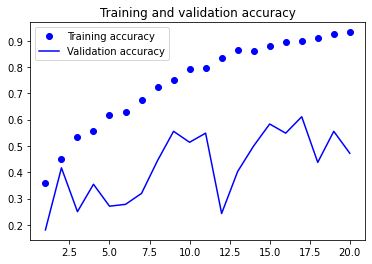

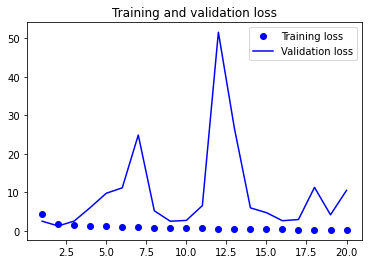

In [64]:
scores = model.evaluate(test_generator, verbose=0)
print("Test Accuracy:"+"%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy') 
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model = models.Sequential()

# Capa de entrada
model.add(DenseNet121(weights=None,input_shape=(256, 256, 3), classes=5))


In [70]:
model.compile(optimizer="rmsprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [71]:
modelo_avioneta=model.fit(train_generator, epochs=15, batch_size=300,validation_data=test_generator)

Epoch 1/15
 2/75 [..............................] - ETA: 9:18 - loss: 2.2085 - accuracy: 0.2500 

d:\Program Files (x86)\ANACONDA\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


75/75 [==============================] - 623s 8s/step - loss: 1.6136 - accuracy: 0.3648 - val_loss: 1.9899 - val_accuracy: 0.2708
Epoch 2/15
75/75 [==============================] - 592s 8s/step - loss: 1.3828 - accuracy: 0.4250 - val_loss: 103.7401 - val_accuracy: 0.2153
Epoch 3/15
75/75 [==============================] - 599s 8s/step - loss: 1.2547 - accuracy: 0.4866 - val_loss: 130.1221 - val_accuracy: 0.2500
Epoch 4/15
75/75 [==============================] - 588s 8s/step - loss: 1.1640 - accuracy: 0.5248 - val_loss: 15.0061 - val_accuracy: 0.3681
Epoch 5/15
75/75 [==============================] - 618s 8s/step - loss: 1.1012 - accuracy: 0.5696 - val_loss: 5.0900 - val_accuracy: 0.2639
Epoch 6/15
75/75 [==============================] - 627s 8s/step - loss: 1.0358 - accuracy: 0.5977 - val_loss: 2.2288 - val_accuracy: 0.3403
Epoch 7/15
75/75 [==============================] - 613s 8s/step - loss: 0.9550 - accuracy: 0.6258 - val_loss: 5.6440 - val_accuracy: 0.3194
Epoch 8/15
75/75 [=

Test Accuracy:accuracy: 37.50%


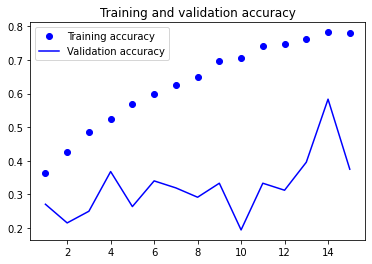

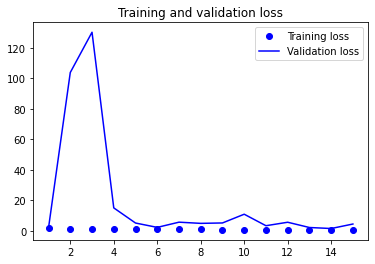

In [72]:
scores = model.evaluate(test_generator, verbose=0)
print("Test Accuracy:"+"%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc = modelo_avioneta.history['accuracy']
val_acc = modelo_avioneta.history['val_accuracy']
loss = modelo_avioneta.history['loss']
val_loss = modelo_avioneta.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy') 
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [76]:
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='sigmoid'))


In [77]:
model.compile(optimizer="rmsprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [78]:
modelo_avioneta_adam=model.fit(train_generator, epochs=15, batch_size=50,validation_data=test_generator)

Epoch 1/15
70/75 [===========================>..] - ETA: 2s - loss: 99.2205 - accuracy: 0.2224 

d:\Program Files (x86)\ANACONDA\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


75/75 [==============================] - 46s 602ms/step - loss: 92.6872 - accuracy: 0.2242 - val_loss: 1.6514 - val_accuracy: 0.1736
Epoch 2/15
75/75 [==============================] - 45s 596ms/step - loss: 2.3743 - accuracy: 0.2028 - val_loss: 1.6114 - val_accuracy: 0.2083
Epoch 3/15
75/75 [==============================] - 45s 601ms/step - loss: 2.8873 - accuracy: 0.2095 - val_loss: 1.6383 - val_accuracy: 0.2014
Epoch 4/15
75/75 [==============================] - 44s 592ms/step - loss: 2.2166 - accuracy: 0.2095 - val_loss: 1.6072 - val_accuracy: 0.2014
Epoch 5/15
75/75 [==============================] - 46s 604ms/step - loss: 2.5459 - accuracy: 0.2162 - val_loss: 1.6076 - val_accuracy: 0.2014
Epoch 6/15
75/75 [==============================] - 46s 612ms/step - loss: 2.0093 - accuracy: 0.2202 - val_loss: 1.6082 - val_accuracy: 0.2014
Epoch 7/15
75/75 [==============================] - 48s 640ms/step - loss: 2.2518 - accuracy: 0.2222 - val_loss: 1.6093 - val_accuracy: 0.2014
Epoch 8/1

Test Accuracy:accuracy: 19.44%


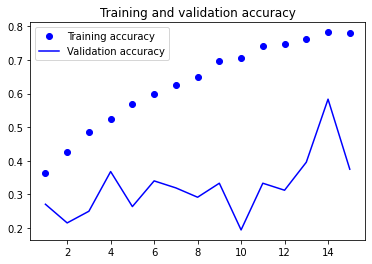

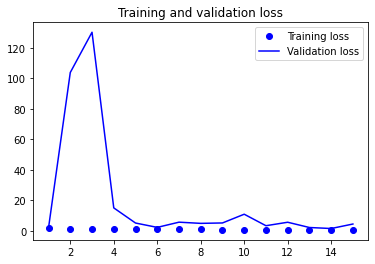

In [79]:
scores = model.evaluate(test_generator, verbose=0)
print("Test Accuracy:"+"%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc = modelo_avioneta.history['accuracy']
val_acc = modelo_avioneta.history['val_accuracy']
loss = modelo_avioneta.history['loss']
val_loss = modelo_avioneta.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy') 
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [82]:
predictions = model.predict(test_generator)
predictions

8/8 [==============================] - 2s 256ms/step


array([[0.4898916 , 0.516896  , 0.50061893, 0.50146794, 0.48589554],
       [0.4898916 , 0.516896  , 0.50061893, 0.50146794, 0.48589554],
       [0.4898916 , 0.516896  , 0.50061893, 0.50146794, 0.48589554],
       [0.4898916 , 0.516896  , 0.50061893, 0.50146794, 0.48589554],
       [0.4898916 , 0.516896  , 0.50061893, 0.50146794, 0.48589554],
       [0.4898916 , 0.516896  , 0.50061893, 0.50146794, 0.48589554],
       [0.4898916 , 0.516896  , 0.50061893, 0.50146794, 0.48589554],
       [0.4898916 , 0.516896  , 0.50061893, 0.50146794, 0.48589554],
       [0.4898916 , 0.516896  , 0.50061893, 0.50146794, 0.48589554],
       [0.4898916 , 0.516896  , 0.50061893, 0.50146794, 0.48589554],
       [0.4898916 , 0.516896  , 0.50061893, 0.50146794, 0.48589554],
       [0.4898916 , 0.516896  , 0.50061893, 0.50146794, 0.48589554],
       [0.4898916 , 0.516896  , 0.50061893, 0.50146794, 0.48589554],
       [0.4898916 , 0.516896  , 0.50061893, 0.50146794, 0.48589554],
       [0.4898916 , 0.516896  , 0.

### PROVAMOS CON LAS IMAGENES EN BLANCO Y NEGRO

In [32]:
train_datagen = ImageDataGenerator(rescale=1./256)

train_generator_trazo = train_datagen.flow_from_directory('C:/Users/crist/BOOTCAMP/PROYECTO FINAL/imagenes/train bn',target_size=(200,200),
    batch_size=20,class_mode='categorical') 

Found 1129 images belonging to 5 classes.


In [33]:
test_generator_trazo = train_datagen.flow_from_directory('C:/Users/crist/BOOTCAMP/PROYECTO FINAL/imagenes/test bn',target_size=(200,200),
    batch_size=20,class_mode='categorical') 

Found 110 images belonging to 5 classes.


##### Provamos con una red senzilla, con max pooling y capas densas

In [8]:
model = models.Sequential()
model.add(layers.MaxPooling2D(pool_size=(3, 3), padding = 'same'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='sigmoid'))

In [9]:
model.compile(optimizer="rmsprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
modelo_avioneta=model.fit(train_generator_trazo, epochs=15, batch_size=10,validation_data=test_generator_trazo)

Epoch 1/15
57/57 [==============================] - 12s 203ms/step - loss: 5.7314 - accuracy: 0.2941 - val_loss: 1.4895 - val_accuracy: 0.3545
Epoch 2/15
57/57 [==============================] - 11s 196ms/step - loss: 1.7818 - accuracy: 0.3481 - val_loss: 1.4681 - val_accuracy: 0.2818
Epoch 3/15
57/57 [==============================] - 11s 193ms/step - loss: 1.5647 - accuracy: 0.3835 - val_loss: 1.4821 - val_accuracy: 0.4091
Epoch 4/15
57/57 [==============================] - 11s 195ms/step - loss: 1.3466 - accuracy: 0.4854 - val_loss: 1.3357 - val_accuracy: 0.5182
Epoch 5/15
57/57 [==============================] - 11s 191ms/step - loss: 1.2264 - accuracy: 0.5474 - val_loss: 1.5103 - val_accuracy: 0.4545
Epoch 6/15
57/57 [==============================] - 11s 187ms/step - loss: 1.1234 - accuracy: 0.6014 - val_loss: 1.4407 - val_accuracy: 0.4818
Epoch 7/15
57/57 [==============================] - 11s 191ms/step - loss: 1.0190 - accuracy: 0.6484 - val_loss: 1.5796 - val_accuracy: 0.5182

Test Accuracy:accuracy: 50.00%


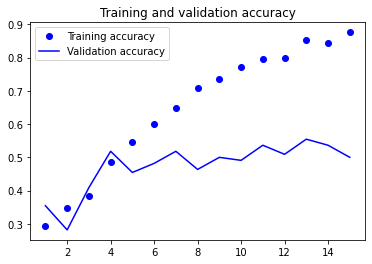

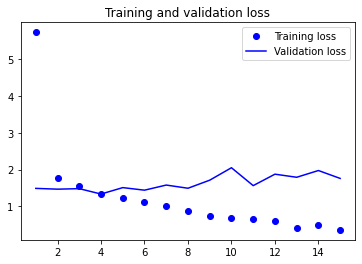

In [11]:
scores = model.evaluate(test_generator_trazo, verbose=0)
print("Test Accuracy:"+"%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc = modelo_avioneta.history['accuracy']
val_acc = modelo_avioneta.history['val_accuracy']
loss = modelo_avioneta.history['loss']
val_loss = modelo_avioneta.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy') 
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

##### En este caso provamos una red sin max pooling pero con más capas densas, parece que empeora

In [43]:
# esta red queda con loss: 1.1104 - accuracy: 0.6078
model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same', strides=2))
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same', strides=2))
model.add(layers.MaxPooling2D(pool_size=(5, 5), padding = 'same'))
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dropout(0.26))
model.add(layers.Dense(140, activation='relu'))
model.add(layers.Dropout(0.22))
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dropout(0.20))
model.add(layers.Dense(5, activation='sigmoid'))

In [44]:
model.compile(optimizer="rmsprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
model.save_weights('modelo 65,45%')

In [45]:
modelo_avioneta=model.fit(train_generator_trazo, epochs=12, batch_size=20,validation_data=test_generator_trazo)

Epoch 1/12
57/57 [==============================] - 17s 281ms/step - loss: 1.6186 - accuracy: 0.2250 - val_loss: 1.5804 - val_accuracy: 0.2455
Epoch 2/12
57/57 [==============================] - 16s 273ms/step - loss: 1.5869 - accuracy: 0.2675 - val_loss: 1.3942 - val_accuracy: 0.5455
Epoch 3/12
57/57 [==============================] - 16s 274ms/step - loss: 1.3890 - accuracy: 0.4243 - val_loss: 1.2260 - val_accuracy: 0.4909
Epoch 4/12
57/57 [==============================] - 16s 273ms/step - loss: 1.2369 - accuracy: 0.4579 - val_loss: 1.1208 - val_accuracy: 0.4364
Epoch 5/12
57/57 [==============================] - 16s 275ms/step - loss: 1.1328 - accuracy: 0.5199 - val_loss: 1.0597 - val_accuracy: 0.5455
Epoch 6/12
57/57 [==============================] - 16s 273ms/step - loss: 0.9627 - accuracy: 0.6014 - val_loss: 1.1107 - val_accuracy: 0.5545
Epoch 7/12
57/57 [==============================] - 16s 275ms/step - loss: 0.7923 - accuracy: 0.6856 - val_loss: 0.9576 - val_accuracy: 0.6455

Test Accuracy:accuracy: 65.45%


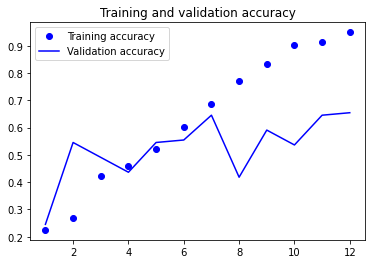

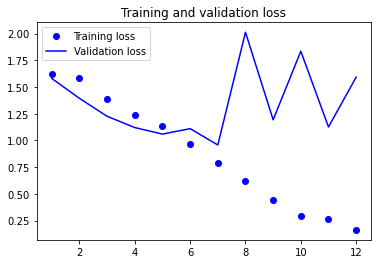

In [46]:
scores = model.evaluate(test_generator_trazo, verbose=0)
print("Test Accuracy:"+"%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc = modelo_avioneta.history['accuracy']
val_acc = modelo_avioneta.history['val_accuracy']
loss = modelo_avioneta.history['loss']
val_loss = modelo_avioneta.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy') 
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [47]:
predictions = model.predict(test_generator_trazo)

6/6 [==============================] - 1s 119ms/step


In [50]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)    

    predicted_label = np.argmax(predictions_array)
    color="red"

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(5))
    plt.yticks([])
    thisplot = plt.bar(range(5), predictions_array, color="magenta")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('blue')
    thisplot[true_label].set_color('green')

In [38]:
test_labels=test_generator_bn.classes

In [42]:
imatges=test_generator_bn[0][0]

In [40]:
class_names=['cartier','hublot','omega','patek','rolex']

In [43]:
num_img=test_generator_bn.filenames

In [44]:
im_array = np.empty(len(num_img), dtype=object)

# iterar sobre las rutas de imágenes y cargar cada imagen en una matriz
for i, path in enumerate(num_img):
    im = Image.open('C:/Users/crist/BOOTCAMP/PROYECTO FINAL/imagenes/test_trazo/'+path)
    im_array[i] = np.array(im)

In [45]:
im_array2=im_array[30:]
predictions2=predictions[30:]
test_labels2=test_labels[30:]

In [46]:
im_array3=im_array[55:]
predictions3=predictions[55:]
test_labels3=test_labels[55:]

In [47]:
im_array4=im_array[75:]
predictions4=predictions[75:]
test_labels4=test_labels[75:]

### Sacados con modelo del 50%

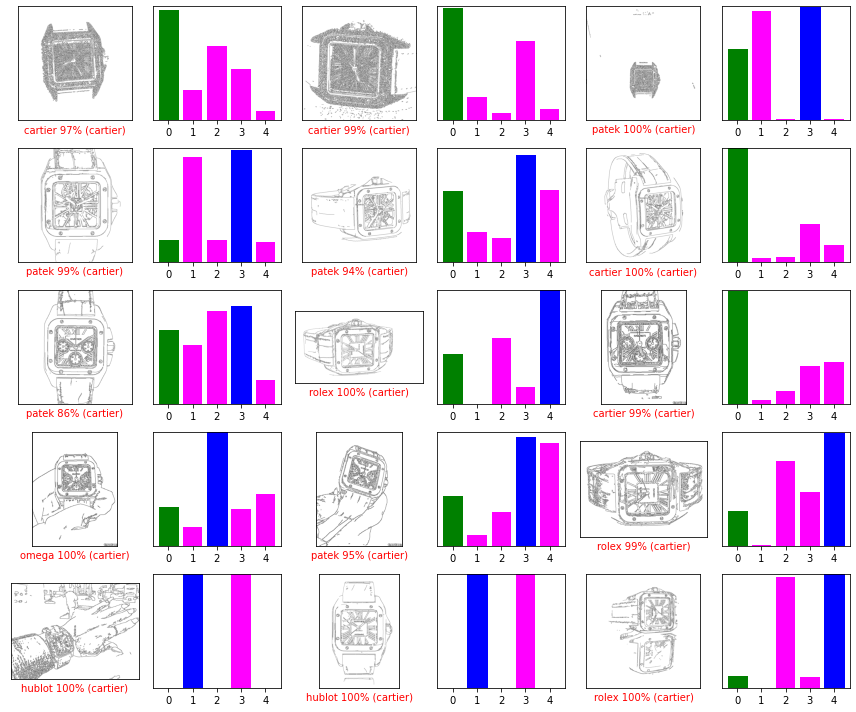

In [58]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    for j in num_img:
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions[i],test_labels, im_array)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions[i],test_labels)
plt.tight_layout()
plt.show()

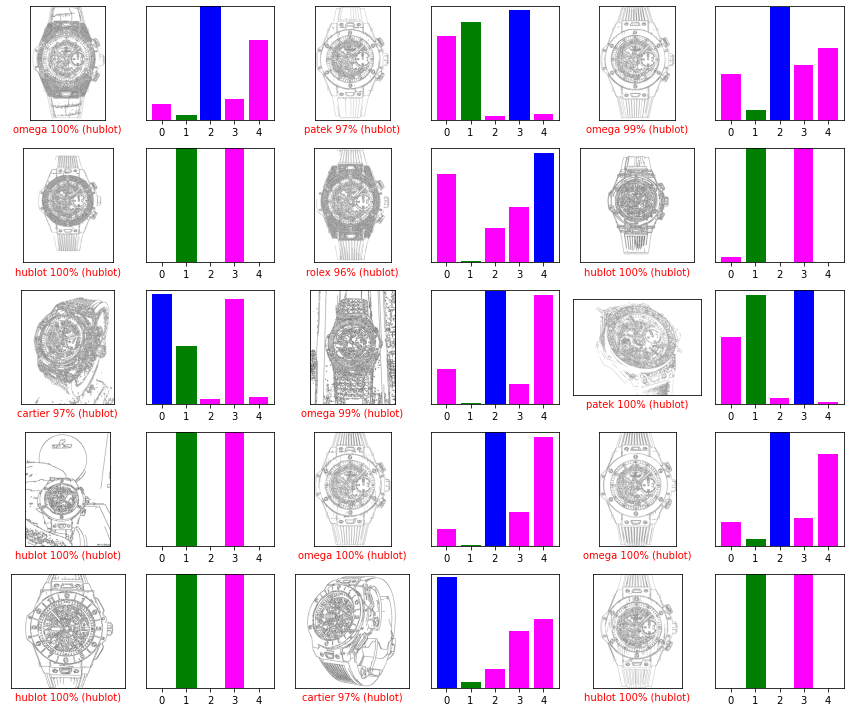

In [59]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    for j in num_img:
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions2[i],test_labels2, im_array2)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions2[i],test_labels2)
plt.tight_layout()
plt.show()

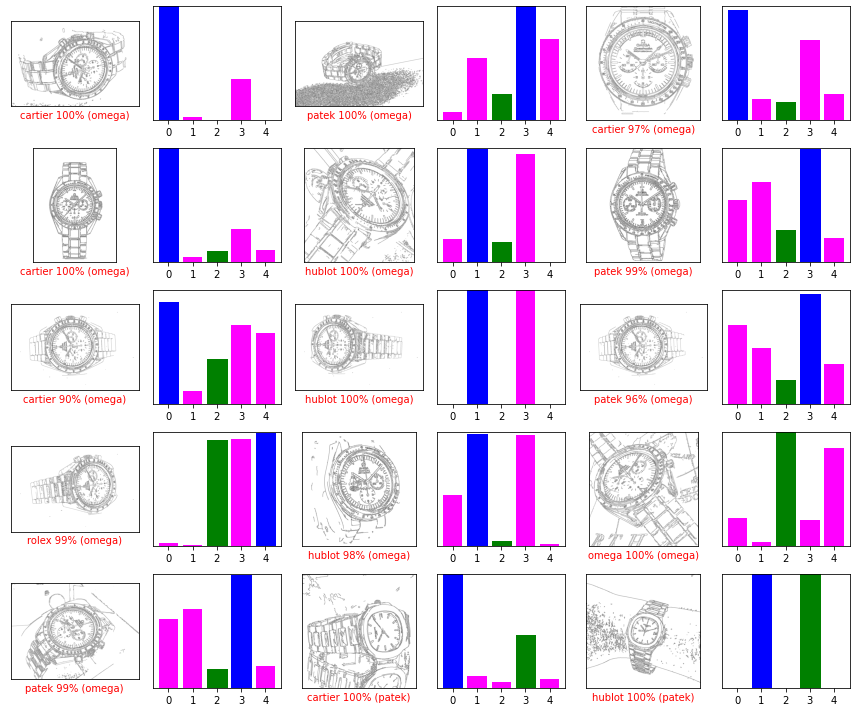

In [60]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    for j in num_img:
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions3[i],test_labels3, im_array3)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions3[i],test_labels3)
plt.tight_layout()
plt.show()

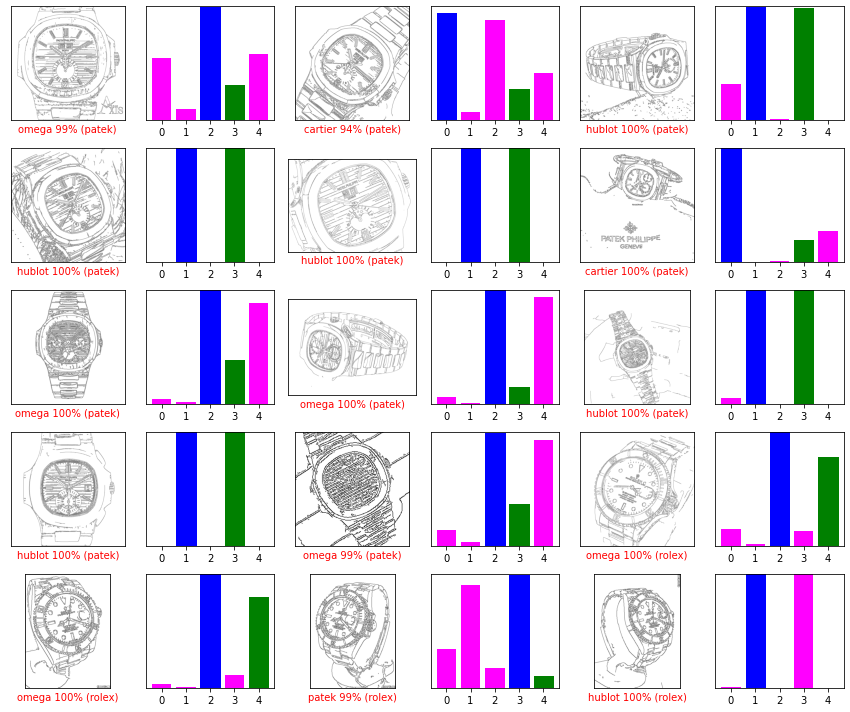

In [61]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    for j in num_img:
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions4[i],test_labels4, im_array4)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions4[i],test_labels4)
plt.tight_layout()
plt.show()

In [79]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same', strides=2))
model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same', strides=2))
model.add(layers.MaxPooling2D(pool_size=(5, 5), padding = 'same'))
model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(layers.ZeroPadding2D((1,1)))
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(layers.MaxPooling2D(pool_size=(5, 5), padding = 'same'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), padding = 'same'))
model.add(layers.Flatten())
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='sigmoid'))

In [80]:
model.compile(optimizer="rmsprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [81]:
modelo_avioneta=model.fit(train_generator_trazo, epochs=13, batch_size=20,validation_data=test_generator_trazo)

Epoch 1/13
57/57 [==============================] - 22s 372ms/step - loss: 1.6143 - accuracy: 0.2108 - val_loss: 1.6010 - val_accuracy: 0.2455
Epoch 2/13
57/57 [==============================] - 21s 364ms/step - loss: 1.5626 - accuracy: 0.2843 - val_loss: 1.3918 - val_accuracy: 0.4545
Epoch 3/13
57/57 [==============================] - 21s 365ms/step - loss: 1.3613 - accuracy: 0.3915 - val_loss: 1.2621 - val_accuracy: 0.3909
Epoch 4/13
57/57 [==============================] - 21s 366ms/step - loss: 1.2661 - accuracy: 0.4030 - val_loss: 1.1552 - val_accuracy: 0.5091
Epoch 5/13
57/57 [==============================] - 21s 363ms/step - loss: 1.1581 - accuracy: 0.4907 - val_loss: 1.1340 - val_accuracy: 0.5182
Epoch 6/13
57/57 [==============================] - 21s 371ms/step - loss: 1.0493 - accuracy: 0.5492 - val_loss: 1.0751 - val_accuracy: 0.5455
Epoch 7/13
57/57 [==============================] - 21s 365ms/step - loss: 0.8783 - accuracy: 0.6484 - val_loss: 1.4435 - val_accuracy: 0.4455

Test Accuracy:accuracy: 64.55%


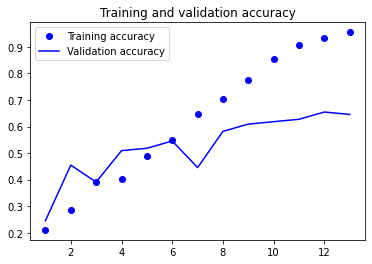

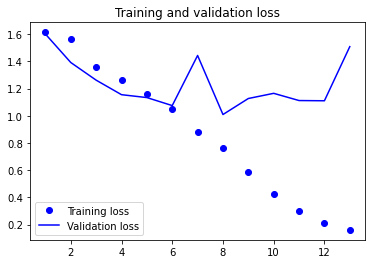

In [82]:
scores = model.evaluate(test_generator_trazo, verbose=0)
print("Test Accuracy:"+"%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc = modelo_avioneta.history['accuracy']
val_acc = modelo_avioneta.history['val_accuracy']
loss = modelo_avioneta.history['loss']
val_loss = modelo_avioneta.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy') 
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [83]:
model.save_weights('modelo 64,55%')

In [195]:
model = models.Sequential()
model.add(layers.Conv2D(100, (3,3), activation='relu', padding='same', strides=2))
model.add(layers.Conv2D(100, (3,3), activation='relu', padding='same', strides=2))
model.add(layers.MaxPooling2D(pool_size=(5, 5), padding = 'same'))
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dropout(0.26))
model.add(layers.Dense(140, activation='relu'))
model.add(layers.Dropout(0.22))
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dropout(0.20))
model.add(layers.Dense(5, activation='sigmoid'))

In [196]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
modelo_avioneta=model.fit(train_generator_trazo, epochs=13, batch_size=15,validation_data=test_generator_trazo)

Epoch 1/13
57/57 [==============================] - 30s 499ms/step - loss: 1.6559 - accuracy: 0.2622 - val_loss: 1.5666 - val_accuracy: 0.2455
Epoch 2/13
57/57 [==============================] - 28s 480ms/step - loss: 1.4518 - accuracy: 0.3463 - val_loss: 1.4586 - val_accuracy: 0.3273
Epoch 3/13
57/57 [==============================] - 27s 480ms/step - loss: 1.2399 - accuracy: 0.4579 - val_loss: 1.4417 - val_accuracy: 0.4909
Epoch 4/13
57/57 [==============================] - 28s 487ms/step - loss: 1.1054 - accuracy: 0.5341 - val_loss: 1.4076 - val_accuracy: 0.3909
Epoch 5/13
57/57 [==============================] - 27s 478ms/step - loss: 0.9501 - accuracy: 0.6103 - val_loss: 1.3123 - val_accuracy: 0.3909
Epoch 6/13
57/57 [==============================] - 27s 477ms/step - loss: 0.7580 - accuracy: 0.6997 - val_loss: 1.3320 - val_accuracy: 0.4000
Epoch 7/13
57/57 [==============================] - 27s 477ms/step - loss: 0.6038 - accuracy: 0.7688 - val_loss: 1.0859 - val_accuracy: 0.5545

Test Accuracy:accuracy: 56.36%


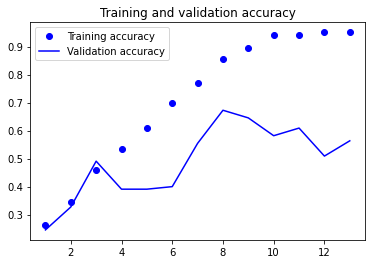

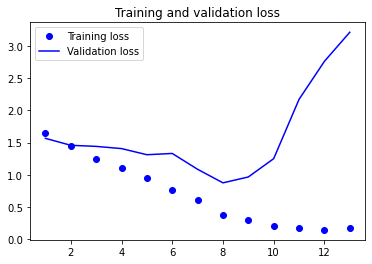

In [45]:
scores = model.evaluate(test_generator_trazo, verbose=0)
print("Test Accuracy:"+"%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc = modelo_avioneta.history['accuracy']
val_acc = modelo_avioneta.history['val_accuracy']
loss = modelo_avioneta.history['loss']
val_loss = modelo_avioneta.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy') 
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(test_generator_trazo)

### Provamos la red pre-entrenada VGG16

In [35]:
train_datagen = ImageDataGenerator(rescale=1./256)

train_generator_bn = train_datagen.flow_from_directory('C:/Users/crist/BOOTCAMP/PROYECTO FINAL/imagenes/train bn',target_size=(200,200),
    batch_size=20,class_mode='categorical') 

Found 1129 images belonging to 5 classes.


In [36]:
test_generator_bn = train_datagen.flow_from_directory('C:/Users/crist/BOOTCAMP/PROYECTO FINAL/imagenes/test bn',target_size=(200,200),
    batch_size=20,class_mode='categorical') 

Found 110 images belonging to 5 classes.


In [26]:
vgg_model = VGG16(weights = "imagenet", include_top=False, input_shape = (200, 200,3))


In [27]:
vgg_model.trainable=False

In [12]:
from tensorflow.keras import regularizers

In [28]:
model = models.Sequential()
model.add(vgg_model)
model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dropout(0.26))
model.add(layers.Dense(140, activation='relu'))
model.add(layers.Dropout(0.22))
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dropout(0.20))
model.add(layers.Dense(5, activation='sigmoid'))

In [34]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
modelo_avioneta=model.fit(train_generator_bn, epochs=7, batch_size=15,validation_data=test_generator_bn)

Epoch 1/7
57/57 [==============================] - 118s 2s/step - loss: 1.7250 - accuracy: 0.4721 - val_loss: 0.8315 - val_accuracy: 0.6545
Epoch 2/7
57/57 [==============================] - 122s 2s/step - loss: 0.7833 - accuracy: 0.6909 - val_loss: 0.5380 - val_accuracy: 0.8545
Epoch 3/7
57/57 [==============================] - 119s 2s/step - loss: 0.4893 - accuracy: 0.8246 - val_loss: 0.5314 - val_accuracy: 0.8455
Epoch 4/7
57/57 [==============================] - 120s 2s/step - loss: 0.3359 - accuracy: 0.8875 - val_loss: 0.6689 - val_accuracy: 0.8000
Epoch 5/7
57/57 [==============================] - 122s 2s/step - loss: 0.2721 - accuracy: 0.9123 - val_loss: 0.5112 - val_accuracy: 0.8636
Epoch 6/7
57/57 [==============================] - 126s 2s/step - loss: 0.2035 - accuracy: 0.9336 - val_loss: 0.4533 - val_accuracy: 0.8636
Epoch 7/7
57/57 [==============================] - 121s 2s/step - loss: 0.1761 - accuracy: 0.9504 - val_loss: 0.6392 - val_accuracy: 0.8364


In [29]:
model.load_weights('modelo final')

In [49]:
predictions = model.predict(test_generator_bn)

6/6 [==============================] - 11s 2s/step


In [50]:
test_generator_bn.image_shape

(200, 200, 3)

### Comprobamos ejemplos del resultado con los siguientes plots

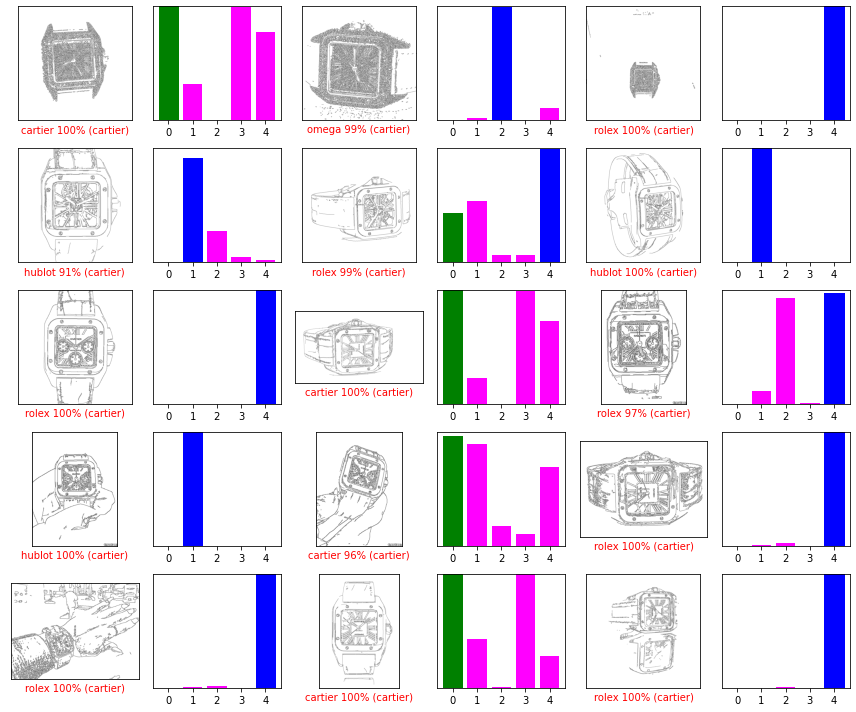

In [51]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    for j in num_img:
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions[i],test_labels, im_array)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions[i],test_labels)
plt.tight_layout()
plt.show()

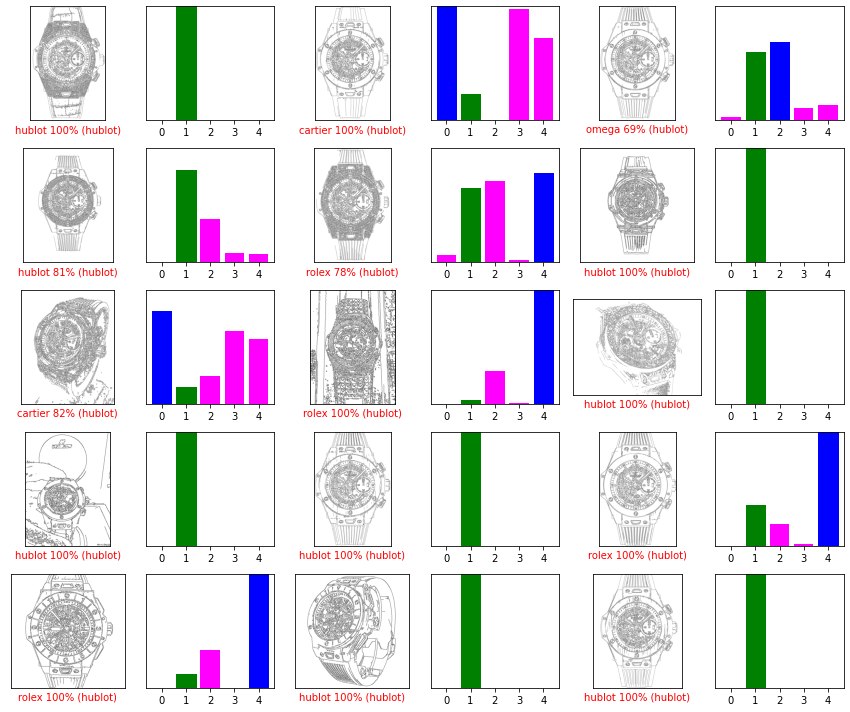

In [52]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    for j in num_img:
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions2[i],test_labels2, im_array2)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions2[i],test_labels2)
plt.tight_layout()
plt.show()

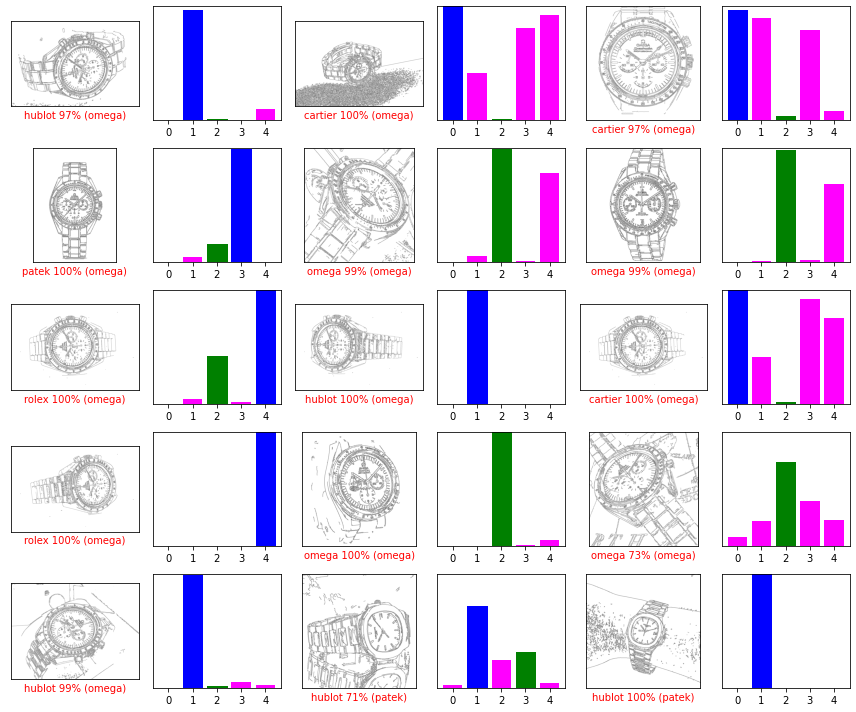

In [53]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    for j in num_img:
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions3[i],test_labels3, im_array3)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions3[i],test_labels3)
plt.tight_layout()
plt.show()

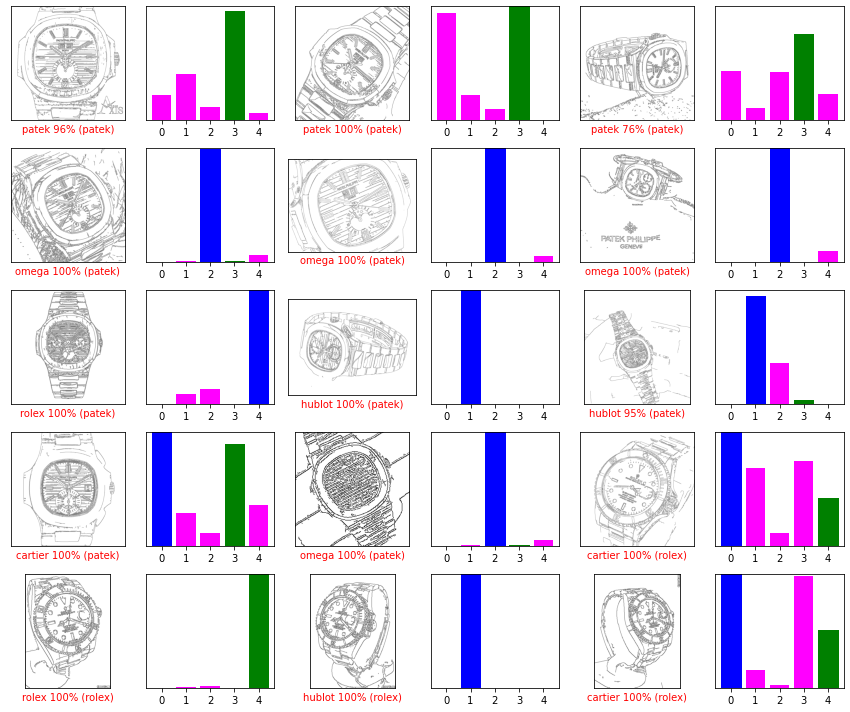

In [54]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    for j in num_img:
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions4[i],test_labels4, im_array4)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions4[i],test_labels4)
plt.tight_layout()
plt.show()

### Provamos con la red VGG19

In [250]:
from tensorflow.keras.applications import VGG19

In [251]:
vgg19_model = VGG19(weights = "imagenet", include_top=False, input_shape = (150, 150,3))
vgg19_model.trainable=False

80134624/80134624 [==============================] - 3s 0us/step


In [323]:
model = models.Sequential()
model.add(vgg19_model)
model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dropout(0.26))
model.add(layers.Dense(140, activation='relu'))
model.add(layers.Dropout(0.22))
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dropout(0.20))
model.add(layers.Dense(5, activation='sigmoid'))

In [324]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [310]:
modelo_avioneta=model.fit(train_generator_bn, epochs=7, batch_size=20,validation_data=test_generator_bn)

Epoch 1/2
57/57 [==============================] - 90s 2s/step - loss: 0.1696 - accuracy: 0.9442 - val_loss: 0.3649 - val_accuracy: 0.8636
Epoch 2/2
57/57 [==============================] - 89s 2s/step - loss: 0.1751 - accuracy: 0.9451 - val_loss: 0.4500 - val_accuracy: 0.8545


In [294]:
predictions = model.predict(test_generator_bn)

6/6 [==============================] - 8s 1s/step


In [65]:
im_array = np.empty(len(num_img), dtype=object)

# iterar sobre las rutas de imágenes y cargar cada imagen en una matriz
for i, path in enumerate(num_img):
    im = Image.open('C:/Users/crist/BOOTCAMP/PROYECTO FINAL/imagenes/test bn/'+path)
    im_array[i] = np.array(im)

In [68]:
im_array4=im_array[90:]
predictions4=predictions[90:]
test_labels4=test_labels[90:]

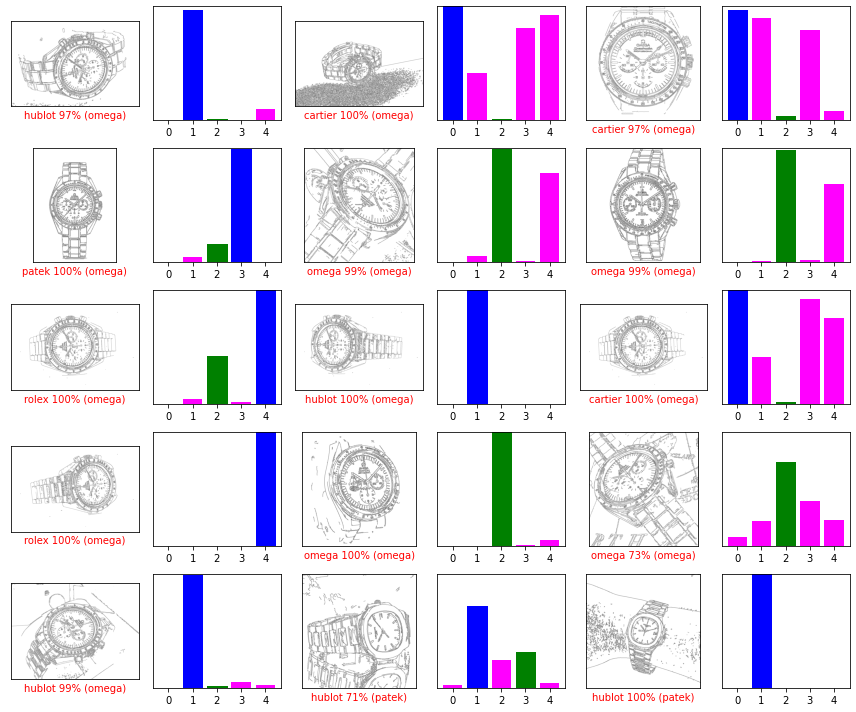

In [69]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    for j in num_img:
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions3[i],test_labels3, im_array3)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions3[i],test_labels3)
plt.tight_layout()
plt.show()

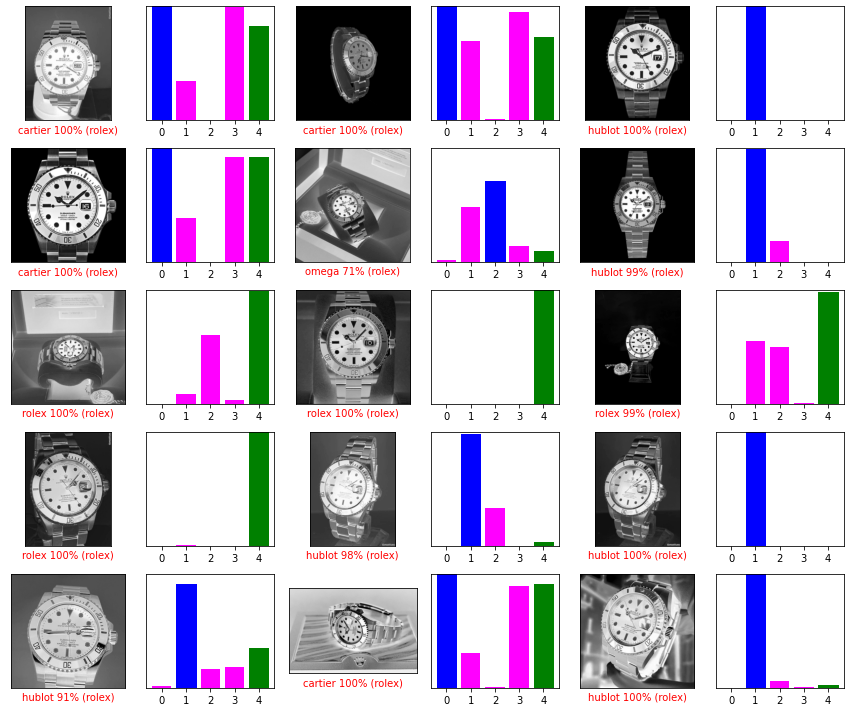

In [70]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    for j in num_img:
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions4[i],test_labels4, im_array4)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions4[i],test_labels4)
plt.tight_layout()
plt.show()

### Función usuario

In [18]:
def modelo(img)
    cam = cv2.VideoCapture(0)
    while(True):
        ret, frame = cam.read()
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cam.release()
    cv2.destroyAllWindows()
    ok=cv2.resize(frame,(200,200))
    gray=cv2.cvtColor(ok,cv2.COLOR_BGR2GRAY)
    gray_3d = np.expand_dims(gray, axis=2)
    gray_3d = np.repeat(gray_3d,3, axis=2)
    plt.imshow(ok)

In [52]:
kk=keras.models.load_model("modelo final save")

In [79]:
kk.predict(gray_3d.reshape((1,200,200,3)))

1/1 [==============================] - 0s 387ms/step


array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 2.0964213e-09,
        0.0000000e+00]], dtype=float32)